In [1]:
%matplotlib inline

In [2]:
import os
import pathlib
import sys

In [3]:
base_path = pathlib.Path(os.getcwd())
base_path = str(base_path.parent)
sys.path = [base_path] + sys.path

In [4]:
import random as python_random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.utils import model_to_dot
from sklearn.preprocessing import StandardScaler
from IPython.display import SVG

In [6]:
seed = 6902

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(seed)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(seed)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(seed)

In [7]:
sns.set(context="notebook", style="darkgrid", palette="deep", font="sans-serif", font_scale=1.0, color_codes=True)

In [8]:
os.makedirs("./img/", exist_ok=True)

In [9]:
true_sd = 1.0 / 2.0
num_train = 128
num_val = 512

X_train = np.random.random(num_train) * 10.
y_train = 1.5 * np.sin(0.4 * np.pi * X_train) + np.sin(0.05 * np.pi * X_train) + 0.1 * X_train + np.random.randn(X_train.size) * true_sd

X_val = np.random.random(num_val) * 10.
y_val = 1.5 * np.sin(0.4 * np.pi * X_val) + np.sin(0.05 * np.pi * X_val) + 0.1 * X_val + np.random.randn(X_val.size) * true_sd

X_test = np.linspace(-15., 25., 1000)
y_test = 1.5 * np.sin(0.4 * np.pi * X_test) + np.sin(0.05 * np.pi * X_test) + 0.1 * X_test

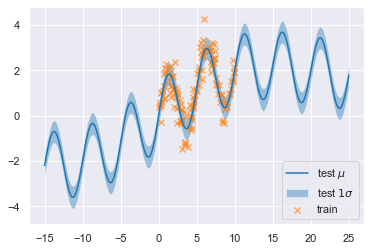

In [10]:
fig, ax = plt.subplots()
ax.plot(X_test, y_test, color="tab:blue", label=r"test $\mu$")
ax.fill_between(X_test, y_test + true_sd, y_test - true_sd, facecolor="tab:blue", alpha=0.4, label=r"test $1 \sigma$")
ax.scatter(X_train, y_train, marker="x", c="tab:orange", alpha=0.6, label="train")
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")
ax.set_ylim(-4.8, 4.8)
ax.legend(loc="lower right")

In [11]:
n_hidden = 50
p = 0.9

inputs = keras.Input((1, ))
dense1 = layers.Dense(50, activation="relu")(inputs)
dense2 = layers.Dense(50, activation="relu")(dense1)
dropout = layers.Dropout(1. - p)(dense2)
dense3 = layers.Dense(50, activation="relu")(dropout)
dense4 = layers.Dense(1, activation="linear")(dense3)
model = keras.Model(inputs=inputs, outputs=dense4)

In [12]:
batch_size = 32
epochs = 1000

es = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=50, verbose=1, mode="auto", restore_best_weights=True)

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam())

scaler = StandardScaler()
scaler.fit(X_train.reshape(-1, 1))
model.fit(scaler.transform(X_train.reshape(-1, 1)), y_train.reshape(-1, 1),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(scaler.transform(X_val.reshape(-1, 1)), y_val.reshape(-1, 1)),
          callbacks=[es])

Train on 128 samples, validate on 512 samples
Epoch 1/1000
128/128 [==============================] - 0s 3ms/sample - loss: 2.4065 - val_loss: 2.1564
Epoch 2/1000
128/128 [==============================] - 0s 250us/sample - loss: 2.1457 - val_loss: 1.9554
Epoch 3/1000
128/128 [==============================] - 0s 234us/sample - loss: 1.9495 - val_loss: 1.7868
Epoch 4/1000
128/128 [==============================] - 0s 242us/sample - loss: 1.7724 - val_loss: 1.6413
Epoch 5/1000
128/128 [==============================] - 0s 242us/sample - loss: 1.6041 - val_loss: 1.5225
Epoch 6/1000
128/128 [==============================] - 0s 297us/sample - loss: 1.5110 - val_loss: 1.4340
Epoch 7/1000
128/128 [==============================] - 0s 234us/sample - loss: 1.4151 - val_loss: 1.3883
Epoch 8/1000
128/128 [==============================] - 0s 242us/sample - loss: 1.3209 - val_loss: 1.3772
Epoch 9/1000
128/128 [==============================] - 0s 242us/sample - loss: 1.2959 - val_loss: 1.3877
Ep

128/128 [==============================] - 0s 234us/sample - loss: 0.4320 - val_loss: 0.4287
Epoch 78/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.4475 - val_loss: 0.4223
Epoch 79/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.4402 - val_loss: 0.4300
Epoch 80/1000
128/128 [==============================] - 0s 195us/sample - loss: 0.4670 - val_loss: 0.4438
Epoch 81/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.4395 - val_loss: 0.4308
Epoch 82/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.4121 - val_loss: 0.4231
Epoch 83/1000
128/128 [==============================] - 0s 203us/sample - loss: 0.4361 - val_loss: 0.4195
Epoch 84/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.4509 - val_loss: 0.4207
Epoch 85/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.3991 - val_loss: 0.4237
Epoch 86/1000
128/128 [============================

128/128 [==============================] - 0s 227us/sample - loss: 0.3360 - val_loss: 0.3598
Epoch 154/1000
128/128 [==============================] - 0s 234us/sample - loss: 0.3675 - val_loss: 0.3622
Epoch 155/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.3395 - val_loss: 0.3593
Epoch 156/1000
128/128 [==============================] - 0s 227us/sample - loss: 0.3362 - val_loss: 0.3511
Epoch 157/1000
128/128 [==============================] - 0s 226us/sample - loss: 0.3548 - val_loss: 0.3494
Epoch 158/1000
128/128 [==============================] - 0s 234us/sample - loss: 0.3273 - val_loss: 0.3487
Epoch 159/1000
128/128 [==============================] - 0s 226us/sample - loss: 0.3710 - val_loss: 0.3507
Epoch 160/1000
128/128 [==============================] - 0s 242us/sample - loss: 0.3011 - val_loss: 0.3648
Epoch 161/1000
128/128 [==============================] - 0s 227us/sample - loss: 0.3548 - val_loss: 0.3597
Epoch 162/1000
128/128 [===================

Epoch 229/1000
128/128 [==============================] - 0s 234us/sample - loss: 0.2838 - val_loss: 0.3382
Epoch 230/1000
128/128 [==============================] - 0s 218us/sample - loss: 0.3080 - val_loss: 0.3339
Epoch 231/1000
128/128 [==============================] - 0s 227us/sample - loss: 0.3058 - val_loss: 0.3375
Epoch 232/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.3118 - val_loss: 0.3342
Epoch 233/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.3157 - val_loss: 0.3325
Epoch 234/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.3063 - val_loss: 0.3276
Epoch 235/1000
128/128 [==============================] - 0s 227us/sample - loss: 0.2879 - val_loss: 0.3276
Epoch 236/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.3149 - val_loss: 0.3309
Epoch 237/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.2881 - val_loss: 0.3291
Epoch 238/1000
128/128 [====

128/128 [==============================] - 0s 203us/sample - loss: 0.2817 - val_loss: 0.3230
Epoch 305/1000
128/128 [==============================] - 0s 227us/sample - loss: 0.2905 - val_loss: 0.3258
Epoch 306/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2976 - val_loss: 0.3271
Epoch 307/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2704 - val_loss: 0.3277
Epoch 308/1000
128/128 [==============================] - 0s 242us/sample - loss: 0.2437 - val_loss: 0.3235
Epoch 309/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.2604 - val_loss: 0.3202
Epoch 310/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2832 - val_loss: 0.3207
Epoch 311/1000
128/128 [==============================] - 0s 273us/sample - loss: 0.2826 - val_loss: 0.3247
Epoch 312/1000
128/128 [==============================] - 0s 258us/sample - loss: 0.2539 - val_loss: 0.3191
Epoch 313/1000
128/128 [===================

Epoch 380/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2659 - val_loss: 0.3234
Epoch 381/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2437 - val_loss: 0.3212
Epoch 382/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2263 - val_loss: 0.3158
Epoch 383/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2428 - val_loss: 0.3180
Epoch 384/1000
128/128 [==============================] - 0s 242us/sample - loss: 0.2431 - val_loss: 0.3199
Epoch 385/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2347 - val_loss: 0.3185
Epoch 386/1000
128/128 [==============================] - 0s 211us/sample - loss: 0.2494 - val_loss: 0.3184
Epoch 387/1000
128/128 [==============================] - 0s 203us/sample - loss: 0.2307 - val_loss: 0.3175
Epoch 388/1000
128/128 [==============================] - 0s 219us/sample - loss: 0.2468 - val_loss: 0.3218
Epoch 389/1000
128/128 [====

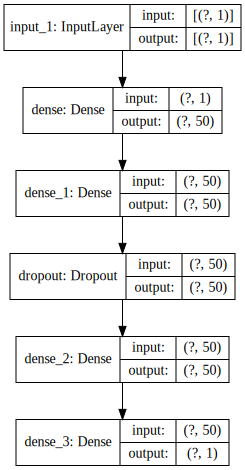

In [13]:
model_to_dot(model, show_shapes=True).write_pdf("img/regression_architecture-nn.pdf")
SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog="dot", format="svg"))

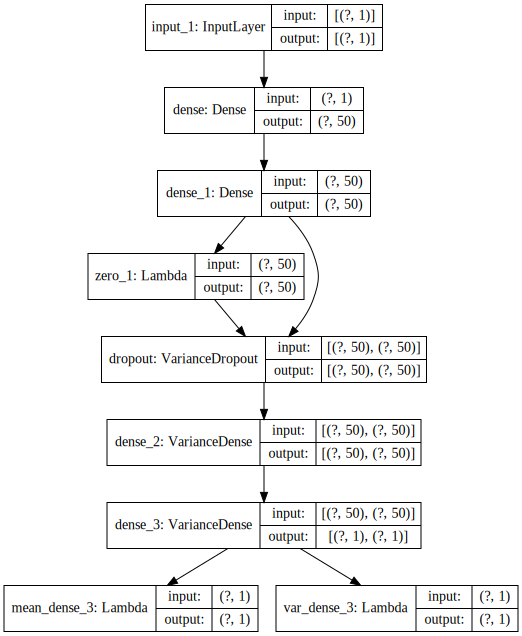

In [14]:
from vpbnn.models import nn2vpbnn

vmodel = nn2vpbnn(model, variance_mode=2)  # independent-mode
model_to_dot(vmodel, show_shapes=True).write_pdf("img/regression_architecture-vpbnn.pdf")
SVG(model_to_dot(vmodel, show_shapes=True, dpi=72).create(prog="dot", format="svg"))

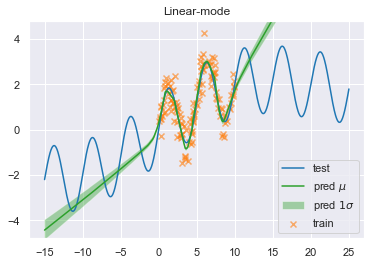

In [15]:
vmodel = nn2vpbnn(model, variance_mode=1)  # linear-mode

pred_mean, pred_var = vmodel.predict(scaler.transform(X_test.reshape(-1, 1)))
pred_mean = pred_mean.ravel()
pred_var = pred_var.ravel()

fig, ax = plt.subplots()
ax.plot(X_test, y_test, color="tab:blue", label="test")
ax.plot(X_test, pred_mean, color="tab:green", label="pred $\mu$")
ax.fill_between(X_test, pred_mean + 1. * np.sqrt(pred_var), pred_mean - 1. * np.sqrt(pred_var), facecolor="tab:green", alpha=0.4, label="pred $1 \sigma$")
ax.scatter(X_train, y_train, marker="x", c="tab:orange", alpha=0.6, label="train")
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")
ax.set_title("Linear-mode")
ax.set_ylim(-4.8, 4.8)
ax.legend(loc="lower right")
fig.savefig("img/regression_linear-mode.pdf", bbox_inches="tight")

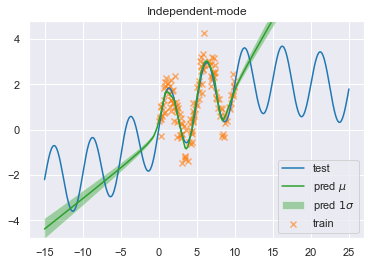

In [16]:
vmodel = nn2vpbnn(model, variance_mode=2)  # independent-mode

pred_mean, pred_var = vmodel.predict(scaler.transform(X_test.reshape(-1, 1)))
pred_mean = pred_mean.ravel()
pred_var = pred_var.ravel()

fig, ax = plt.subplots()
ax.plot(X_test, y_test, color="tab:blue", label="test")
ax.plot(X_test, pred_mean, color="tab:green", label="pred $\mu$")
ax.fill_between(X_test, pred_mean + 1. * np.sqrt(pred_var), pred_mean - 1. * np.sqrt(pred_var), facecolor="tab:green", alpha=0.4, label="pred $1 \sigma$")
ax.scatter(X_train, y_train, marker="x", c="tab:orange", alpha=0.6, label="train")
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")
ax.set_title("Independent-mode")
ax.set_ylim(-4.8, 4.8)
ax.legend(loc="lower right")
fig.savefig("img/regression_independent-mode.pdf", bbox_inches="tight")

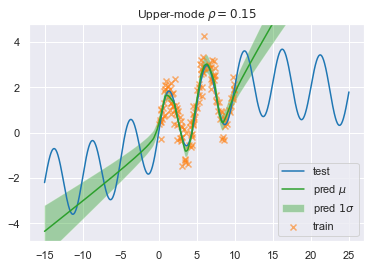

In [17]:
rho = 0.15
vmodel = nn2vpbnn(model, variance_mode=3, rho=rho)  # upper-mode

pred_mean, pred_var = vmodel.predict(scaler.transform(X_test.reshape(-1, 1)))
pred_mean = pred_mean.ravel()
pred_var = pred_var.ravel()

fig, ax = plt.subplots()
ax.plot(X_test, y_test, color="tab:blue", label="test")
ax.plot(X_test, pred_mean, color="tab:green", label="pred $\mu$")
ax.fill_between(X_test, pred_mean + 1. * np.sqrt(pred_var), pred_mean - 1. * np.sqrt(pred_var), facecolor="tab:green", alpha=0.4, label="pred $1 \sigma$")
ax.scatter(X_train, y_train, marker="x", c="tab:orange", alpha=0.6, label="train")
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")
ax.set_title(r"Upper-mode $\rho={0}$".format(rho))
ax.set_ylim(-4.8, 4.8)
ax.legend(loc="lower right")
fig.savefig("img/regression_upper-mode.pdf", bbox_inches="tight")

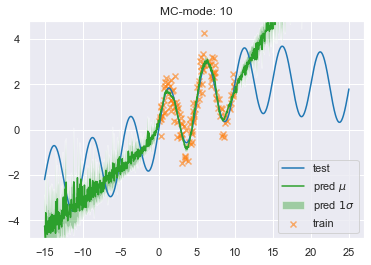

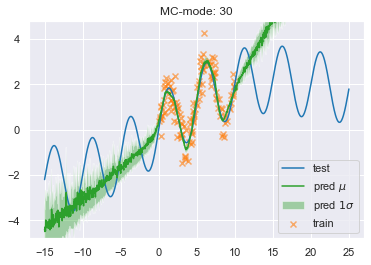

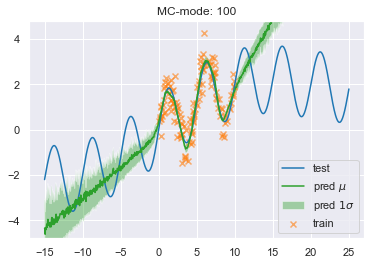

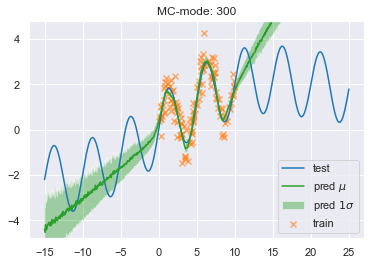

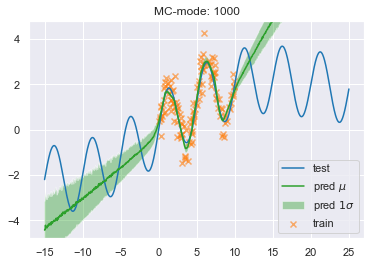

In [18]:
vmodel = nn2vpbnn(model, variance_mode=4)  # MC-mode

num_mcs = sorted([10, 30, 100, 300, 1000])

y_preds = []
for _ in range(max(num_mcs)):
    predict, _ = vmodel.predict(scaler.transform(X_test.reshape(-1, 1)))
    y_preds.append(predict.ravel())
y_preds = np.array(y_preds).reshape((max(num_mcs), -1))

for num_mc in num_mcs:
    y_mean = np.mean(y_preds[:num_mc], axis=0)
    y_std = np.std(y_preds[:num_mc], axis=0)
    
    fig, ax = plt.subplots()
    ax.plot(X_test, y_test, color="tab:blue", label="test")
    ax.fill_between(X_test, y_mean + 1. * y_std, y_mean - 1. * y_std, facecolor="tab:green", alpha=0.4, label="pred $1 \sigma$")
    ax.plot(X_test, y_mean, color="tab:green", label="pred $\mu$")
    ax.scatter(X_train, y_train, marker="x", c="tab:orange", alpha=0.6, label="train")
#     ax.set_xlabel(r"$x$")
#     ax.set_ylabel(r"$y$")
    ax.set_title("MC-mode: {0}".format(num_mc))
    ax.set_ylim(-4.8, 4.8)
    ax.legend(loc="lower right")
    fig.savefig("img/regression_mc{0:04d}-mode.pdf".format(num_mc), bbox_inches="tight")    

In [19]:
vmodel = nn2vpbnn(model, variance_mode=4)  # MC-mode
pmodel = keras.Model(inputs=vmodel.input, outputs=vmodel.layers[5].output[0])

num_mc = 500
y_preds = []
for _ in range(num_mc):
    predict = pmodel.predict(scaler.transform(X_test.reshape(-1, 1)))
    y_preds.append(predict)

In [20]:
y_preds = np.transpose(np.array(y_preds), (1, 0, 2))

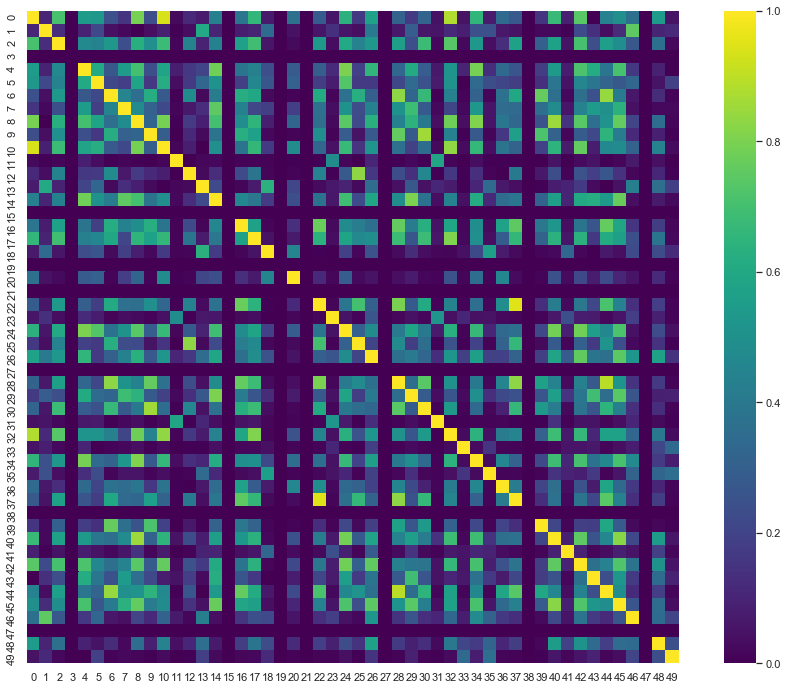

In [21]:
df = pd.DataFrame(y_preds[200, ...])
corr = df.corr()
corr[np.isnan(corr)] = 0.0
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, cmap="viridis", square=True, ax=ax)

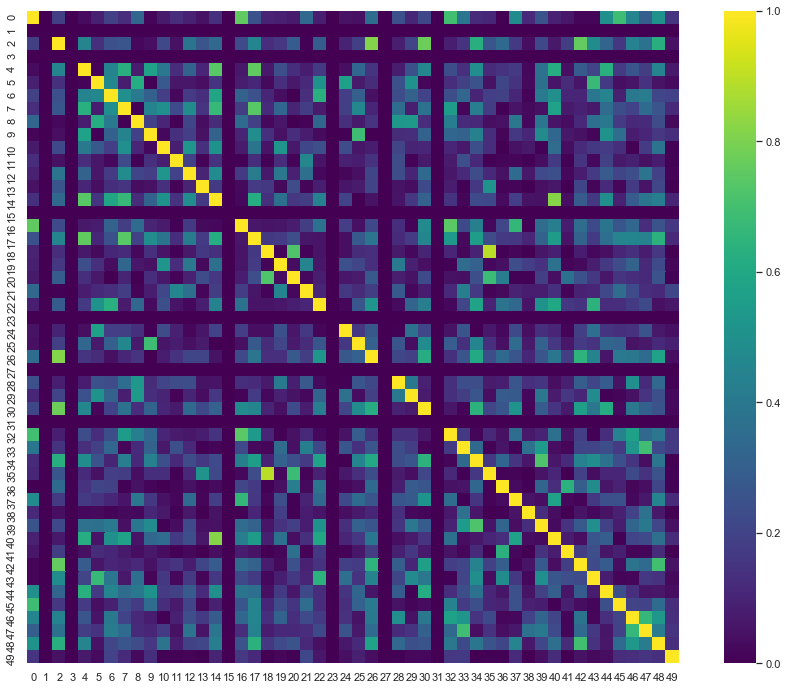

In [22]:
df = pd.DataFrame(y_preds[400, ...])
corr = df.corr()
corr[np.isnan(corr)] = 0.0
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, cmap="viridis", square=True, ax=ax)

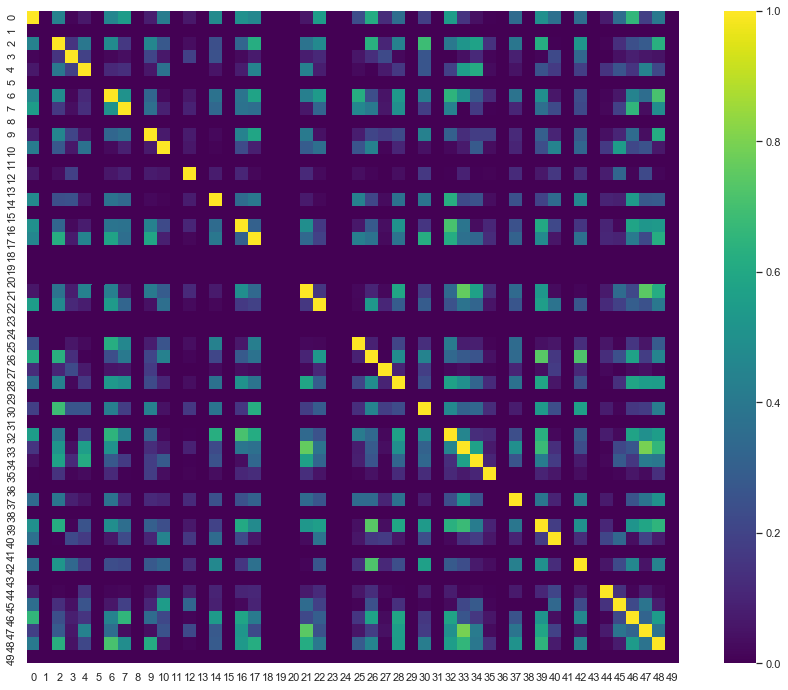

In [23]:
df = pd.DataFrame(y_preds[500, ...])
corr = df.corr()
corr[np.isnan(corr)] = 0.0
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, cmap="viridis", square=True, ax=ax)

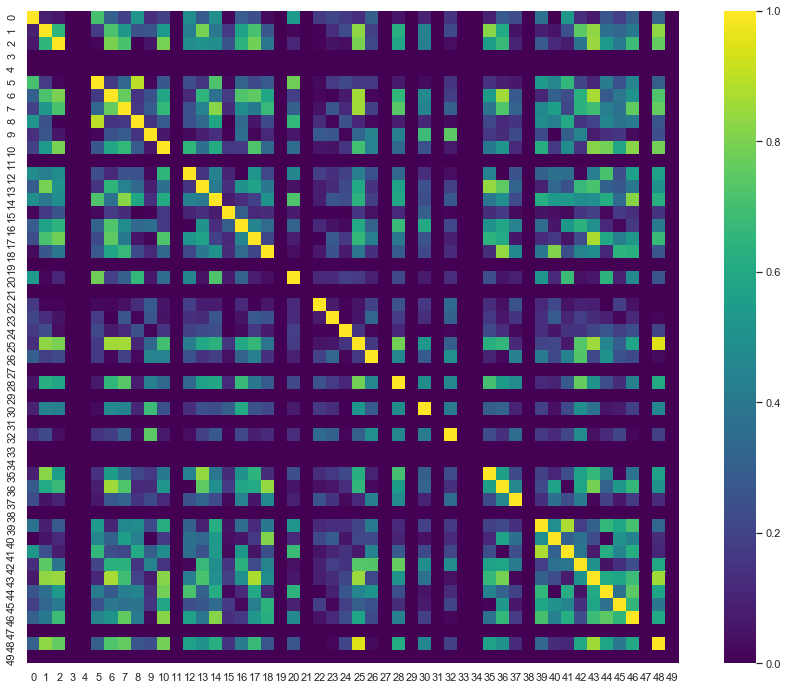

In [24]:
df = pd.DataFrame(y_preds[600, ...])
corr = df.corr()
corr[np.isnan(corr)] = 0.0
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, cmap="viridis", square=True, ax=ax)

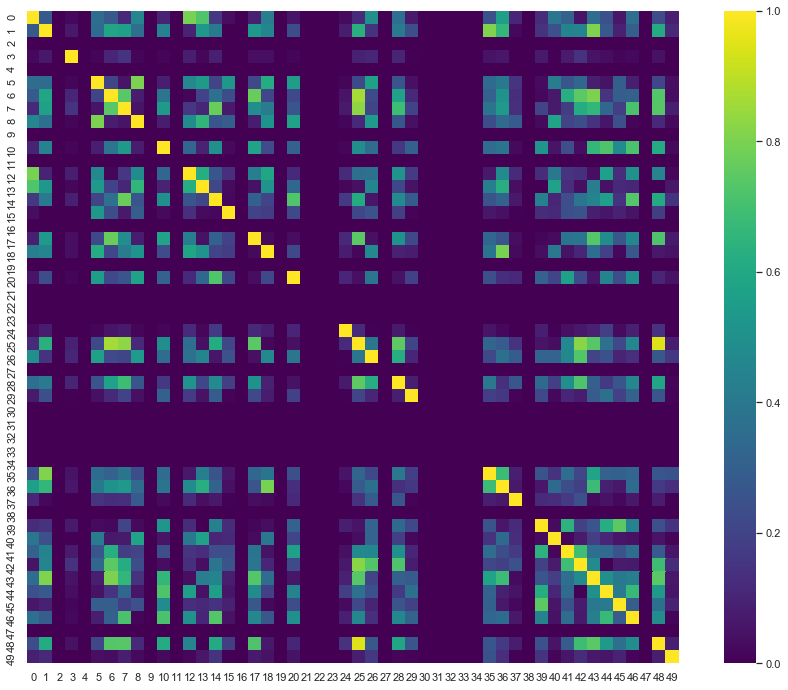

In [25]:
df = pd.DataFrame(y_preds[800, ...])
corr = df.corr()
corr[np.isnan(corr)] = 0.0
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corr, cmap="viridis", square=True, ax=ax)

In [26]:
X_test[200],X_test[400],X_test[500],X_test[600],X_test[800]

(-6.991991991991991,
 1.0160160160160174,
 5.02002002002002,
 9.024024024024023,
 17.032032032032035)